In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [43]:
data_salary = pd.read_csv("./data/data_assets/players_salaries_hist.csv")
data_performance = pd.read_csv("FourFactorsRAPM.csv", delimiter=",", skiprows=1)
data_performance = data_performance.reset_index().drop(['index'], axis=1)
data_players = pd.read_csv("player_data_for_scores.csv")

In [44]:
data_players['SEASON_ID'] = data_players['SEASON_ID'].apply(lambda x: x.replace("-", "/"))
rookie_seasons = data_players.groupby(['PLAYER_ID'])[['PLAYER_AGE', 'SEASON_ID']].min().reset_index()
rookie_seasons = rookie_seasons.rename(columns={'PLAYER_AGE':'ROOKIE_AGE'})
data_players = pd.merge(data_players, rookie_seasons, on=["PLAYER_ID", "SEASON_ID"], how='left')

In [45]:
data_players.loc[data_players['ROOKIE_AGE'].isna(), 'ROOKIE'] = int(0)
data_players.loc[~data_players['ROOKIE_AGE'].isna(), 'ROOKIE'] = int(1)

In [46]:
data_players['PLAYER_AGE']

0       22.0
1       23.0
2       24.0
3       24.0
4       23.0
        ... 
3381    29.0
3382    20.0
3383    23.0
3384    24.0
3385    25.0
Name: PLAYER_AGE, Length: 3386, dtype: float64

In [47]:
data_rookie = data_players[['PLAYER_ID', 'SEASON_ID', 'ROOKIE', 'ROOKIE_AGE','PLAYER_AGE']]
data_rookie['id'] = data_rookie['PLAYER_ID'].astype(float)
data_rookie['season'] = data_rookie['SEASON_ID']

In [48]:
data_rookie

,PLAYER_ID,SEASON_ID,ROOKIE,ROOKIE_AGE,PLAYER_AGE,id,season
0,1629620,2019/20,1.0,22.0,22.0,1629620.0,2019/20
1,1629620,2020/21,0.0,NaN,23.0,1629620.0,2020/21
2,1629620,2021/22,0.0,NaN,24.0,1629620.0,2021/22
3,1629620,2021/22,0.0,NaN,24.0,1629620.0,2021/22
4,1628411,2017/18,1.0,23.0,23.0,1628411.0,2017/18
...,...,...,...,...,...,...,...
3381,202335,2017/18,0.0,NaN,29.0,202335.0,2017/18
3382,1630185,2020/21,1.0,20.0,20.0,1630185.0,2020/21
3383,1629672,2019/20,1.0,23.0,23.0,1629672.0,2019/20
3384,1629672,2020/21,0.0,NaN,24.0,1629672.0,2020/21


In [49]:
data_players

,Unnamed: 0,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FG_PCT,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,ROOKIE_AGE,ROOKIE
0,0,1629620,2019/20,1.610613e+09,22.0,9,0,5.4,0.417,1.3,...,0.4,0.6,0.8,0.0,0.1,0.3,0.2,1.4,22.0,1.0
1,1,1629620,2020/21,1.610613e+09,23.0,9,0,9.8,0.333,2.3,...,0.7,0.8,1.0,0.3,0.0,0.2,1.1,2.3,NaN,0.0
2,2,1629620,2021/22,1.610613e+09,24.0,17,0,11.6,0.316,3.4,...,0.6,0.8,1.2,0.5,0.0,0.6,1.0,2.8,NaN,0.0
3,3,1629620,2021/22,1.610613e+09,24.0,1,0,7.4,0.000,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0
4,0,1628411,2017/18,1.610613e+09,23.0,62,12,16.5,0.427,3.5,...,1.6,2.2,0.9,0.5,0.2,0.5,1.3,3.7,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,4,202335,2017/18,1.610613e+09,29.0,6,0,9.6,0.500,1.0,...,1.7,1.8,0.5,0.2,0.0,0.5,1.3,1.3,NaN,0.0
3382,0,1630185,2020/21,1.610613e+09,20.0,30,1,12.1,0.342,3.8,...,1.3,1.5,2.3,0.5,0.0,1.0,1.0,4.1,20.0,1.0
3383,0,1629672,2019/20,1.610613e+09,23.0,60,26,27.6,0.497,10.7,...,3.2,4.6,2.1,0.5,0.2,1.6,2.1,14.0,23.0,1.0
3384,1,1629672,2020/21,1.610613e+09,24.0,40,2,17.4,0.497,7.5,...,2.5,3.2,1.3,0.3,0.2,1.1,1.7,9.5,NaN,0.0


In [50]:
data_performance

,playerId,playerName,LA_RAPM,LA_RAPM_Rank,LA_RAPM__Def,LA_RAPM__Def_Rank,LA_RAPM__Off,LA_RAPM__Off_Rank,RA_EFG,RA_EFG_Rank,...,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,season,teamId,teamName,primaryKey,playerRole
0,101108,Chris Paul,1.37,37,0.58,76,0.79,63.0,0.42,117,...,44,0.92,53,0.75,94.0,2020-21,1610612756,PHX,101108_2020-21,"Ball Handler, Primary Playmaker"
1,1629130,Duncan Robinson,2.18,11,0.85,41,1.33,21.0,2.32,2,...,4,1.33,22,2.34,6.0,2019-20,1610612748,MIA,1629130_2019-20,No Role Available
2,1628415,Dillon Brooks,1.33,42,0.84,39,0.49,105.0,0.88,37,...,34,1.00,41,0.84,81.0,2020-21,1610612763,MEM,1628415_2020-21,"Wing, Shooter"
3,101107,Marvin Williams,-0.10,242,0.09,193,-0.19,291.0,-0.71,452,...,313,-0.23,310,-0.16,268.0,2016-17,1610612766,CHA,101107_2016-17,No Role Available
4,200752,Rudy Gay,0.75,95,0.86,36,-0.11,297.0,-0.49,440,...,259,0.48,119,-0.52,406.0,2019-20,1610612759,SAS,200752_2019-20,No Role Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,2617,Udonis Haslem,-0.10,282,0.04,234,-0.13,331.0,-0.15,340,...,339,0.13,186,-0.45,403.0,2018-19,1610612748,MIA,2617_2018-19,No Role Available
2620,2730,Dwight Howard,-0.38,370,0.06,211,-0.44,421.0,-0.19,357,...,407,-0.23,360,-0.42,393.0,2018-19,1610612764,WAS,2730_2018-19,No Role Available
2621,2733,Shaun Livingston,-0.42,380,-0.06,299,-0.36,400.0,0.39,96,...,277,0.12,188,-0.21,334.0,2018-19,1610612744,GSW,2733_2018-19,No Role Available
2622,2736,Luol Deng,0.63,100,0.07,205,0.56,81.0,0.70,53,...,58,0.43,122,0.89,56.0,2018-19,1610612750,MIN,2736_2018-19,No Role Available


In [51]:
data_salary.iloc[443, :]

Unnamed: 0                   443
id                        2570.0
player_names    Kendrick Perkins
2016/17                      0.0
2017/18                 131562.0
2018/19                      0.0
2019/20                      0.0
2020/21                      0.0
2021/22                      0.0
2022/23                      0.0
2023/24                      0.0
2024/25                      0.0
Name: 443, dtype: object

In [52]:
# melt and drop duplicates for salary data
tmp1 = data_salary.melt(id_vars=['id'], value_vars=['2016/17', '2017/18', '2018/19','2019/20', '2020/21'])
tmp1 = tmp1.drop_duplicates().rename(columns={'variable':'season', 'value':'salary'})

# melt and edit season columns for the RAPM data
tmp2 = data_performance.melt(id_vars=['playerId', 'season'], value_vars=['RAPM']).drop('variable', axis=1).rename(columns={'value':'RAPM'})
tmp2['season'] = tmp2['season'].apply(lambda x: x.replace("-", "/"))
tmp2['id'] = tmp2['playerId'].astype(float)

# merge the two datasets
df_model = pd.merge(tmp1, tmp2, on=['id', 'season'])
df_model = df_model.drop('playerId', axis=1)

In [53]:
df_model.sort_values(['id', 'season'])

,id,season,salary,RAPM
441,1713.0,2016/17,4264057.0,1.67
937,1713.0,2017/18,8000000.0,0.10
1419,1713.0,2018/19,2393887.0,-0.80
1794,1713.0,2019/20,0.0,-0.94
120,1717.0,2016/17,25000000.0,0.22
...,...,...,...,...
1543,1629234.0,2019/20,79568.0,-0.92
1899,1629234.0,2020/21,1620564.0,-0.80
1133,1629312.0,2018/19,7725.0,-0.38
1140,1629353.0,2018/19,4737.0,-0.23


In [54]:
# add more information
tmp = pd.read_csv("./data/season_prediction/player_season_scores.csv")
tmp['id'] = tmp['PLAYER_ID'].astype(float)
tmp['season'] = tmp['SEASON_ID'].apply(lambda x: x.replace("-", "/"))

# from USA flag
tmp['FROM_US'] = tmp['LAST_AFFILIATION'].apply(lambda x: int(x.find("USA") > 0))

tmp2 = pd.merge(df_model, tmp, on=['season', 'id'])

# position flag
df_model = pd.get_dummies(tmp2, columns=["POSITION"])
data_rookie = data_rookie.drop(['PLAYER_ID', 'SEASON_ID'], axis=1)
data_rookie['id'] = data_rookie['id'].astype(float)
df_model = pd.merge(df_model, data_rookie, on=['id', 'season'], how='left')

In [55]:
df_model

,id,season,salary,RAPM,Unnamed: 0,PLAYER_ID,coef,CI_UPP_90,CI_LOW_90,SEASON_ID,...,POSITION_Center,POSITION_Center-Forward,POSITION_Forward,POSITION_Forward-Center,POSITION_Forward-Guard,POSITION_Guard,POSITION_Guard-Forward,ROOKIE,ROOKIE_AGE,PLAYER_AGE_y
0,1627773.0,2016/17,650.0,-0.09,334,1627773,-0.000124,0.073062,-0.073310,2016-17,...,1,0,0,0,0,0,0,NaN,NaN,NaN
1,201166.0,2016/17,2700000.0,-0.57,442,201166,0.000073,0.073257,-0.073110,2016-17,...,0,0,0,0,0,1,0,NaN,NaN,NaN
2,203932.0,2016/17,4351320.0,0.67,145,203932,0.000039,0.073218,-0.073141,2016-17,...,0,0,1,0,0,0,0,0.0,NaN,21.0
3,1626151.0,2016/17,365289.0,-0.08,453,1626151,0.000079,0.073266,-0.073107,2016-17,...,0,0,0,0,0,1,0,NaN,NaN,NaN
4,203940.0,2016/17,2022240.0,0.12,445,203940,-0.000042,0.073144,-0.073228,2016-17,...,0,0,1,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1626195.0,2020/21,1737145.0,0.01,10,1626195,0.000233,0.080798,-0.080332,2020-21,...,0,1,0,0,0,0,0,0.0,NaN,27.0
1790,1627812.0,2020/21,0.0,-0.08,253,1627812,-0.000246,0.080323,-0.080814,2020-21,...,0,0,0,0,0,1,0,0.0,NaN,28.0
1791,1627812.0,2020/21,0.0,-0.08,253,1627812,-0.000246,0.080323,-0.080814,2020-21,...,0,0,0,0,0,1,0,0.0,NaN,28.0
1792,1629139.0,2020/21,737996.0,-0.23,413,1629139,0.000189,0.080754,-0.080377,2020-21,...,0,0,0,0,0,0,1,0.0,NaN,26.0


In [56]:
df_model = df_model.drop_duplicates()

In [57]:
df_model.sort_values(['id', 'season']).columns.tolist()

['id',
 'season',
 'salary',
 'RAPM',
 'Unnamed: 0',
 'PLAYER_ID',
 'coef',
 'CI_UPP_90',
 'CI_LOW_90',
 'SEASON_ID',
 'TEAM_ID',
 'PLAYER_AGE_x',
 'GP',
 'GS',
 'MIN',
 'FG_PCT',
 'FGA',
 'FG3_PCT',
 'FG3A',
 'FT_PCT',
 'FTA',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PERSON_ID',
 'DISPLAY_FIRST_LAST',
 'DRAFT_YEAR',
 'DRAFT_ROUND',
 'DRAFT_NUMBER',
 'GREATEST_75_FLAG',
 'HEIGHT',
 'WEIGHT',
 'LAST_AFFILIATION',
 'HEIGHT_METER',
 'WEIGHT_KG',
 'coef_scaled',
 'coef_perc_rank',
 'coef_perc_rank_UPP',
 'coef_perc_rank_LOW',
 'FROM_US',
 'POSITION_Center',
 'POSITION_Center-Forward',
 'POSITION_Forward',
 'POSITION_Forward-Center',
 'POSITION_Forward-Guard',
 'POSITION_Guard',
 'POSITION_Guard-Forward',
 'ROOKIE',
 'ROOKIE_AGE',
 'PLAYER_AGE_y']

In [58]:
select_features = ['id', 'season', 'salary', 'PLAYER_AGE_y', 'RAPM', 'POSITION_Center', 'POSITION_Center-Forward', 'POSITION_Forward', 'POSITION_Forward-Center', 'POSITION_Forward-Guard','POSITION_Guard','POSITION_Guard-Forward','HEIGHT_METER', 'WEIGHT_KG', 'DRAFT_NUMBER', 'DRAFT_YEAR', 'GP', 'GS', 'PTS', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'OREB', 'DREB', 'MIN','FG_PCT', 'FGA', 'FG3_PCT', 'FG3A', 'FT_PCT', 'FTA', 'ROOKIE', 'ROOKIE_AGE', 'FROM_US', 'coef_perc_rank']

In [59]:
df_model = df_model[select_features]

In [60]:
df_model

,id,season,salary,PLAYER_AGE_y,RAPM,POSITION_Center,POSITION_Center-Forward,POSITION_Forward,POSITION_Forward-Center,POSITION_Forward-Guard,...,FG_PCT,FGA,FG3_PCT,FG3A,FT_PCT,FTA,ROOKIE,ROOKIE_AGE,FROM_US,coef_perc_rank
0,1627773.0,2016/17,650.0,NaN,-0.09,1,0,0,0,0,...,0.405,1.9,0.500,0.5,0.450,0.9,NaN,NaN,1,33.70
1,201166.0,2016/17,2700000.0,NaN,-0.57,0,0,0,0,0,...,0.403,4.6,0.375,2.0,0.800,0.6,NaN,NaN,1,62.66
2,203932.0,2016/17,4351320.0,21.0,0.67,0,0,1,0,0,...,0.454,10.8,0.288,3.3,0.719,2.7,0.0,NaN,1,58.29
3,1626151.0,2016/17,365289.0,NaN,-0.08,0,0,0,0,0,...,0.000,0.8,0.000,0.4,0.500,0.4,NaN,NaN,1,63.39
4,203940.0,2016/17,2022240.0,NaN,0.12,0,0,1,0,0,...,0.426,3.0,0.200,0.8,0.737,1.1,NaN,NaN,1,45.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,1626161.0,2020/21,4100000.0,27.0,1.03,1,0,0,0,0,...,0.632,3.4,0.091,0.2,0.628,1.5,0.0,NaN,1,52.90
1789,1626195.0,2020/21,1737145.0,27.0,0.01,0,1,0,0,0,...,0.563,5.7,0.100,0.2,0.667,2.0,0.0,NaN,0,76.14
1790,1627812.0,2020/21,0.0,28.0,-0.08,0,0,0,0,0,...,0.333,4.5,0.316,2.4,1.000,0.9,0.0,NaN,1,29.28
1792,1629139.0,2020/21,737996.0,26.0,-0.23,0,0,0,0,0,...,0.439,3.6,0.400,1.8,0.828,0.6,0.0,NaN,0,72.68


In [61]:
# create undrafted flag
df_model.loc[df_model['DRAFT_NUMBER'] == "Undrafted", 'Undrafted'] = 1
df_model.loc[df_model['DRAFT_NUMBER'] != "Undrafted", 'Undrafted'] = 0
df_model.loc[df_model['DRAFT_NUMBER'] == "Undrafted", "DRAFT_NUMBER"] = 61
df_model['DRAFT_NUMBER'] = df_model['DRAFT_NUMBER'].astype(float)
df_model['Undrafted_Rookie'] = df_model['Undrafted'] * df_model['ROOKIE']

In [62]:
# create more features
df_model['log_rapm'] = np.log1p(df_model['RAPM'])
df_model['RAPM_2'] = df_model['RAPM'] ** 2
df_model['log_rapm_2'] = np.log1p(df_model['RAPM_2'])
df_model['log_salary'] = np.log1p(df_model['salary'])
df_model['PLAYER_AGE'] = df_model['PLAYER_AGE_y']
df_model['PLAYER_AGE_2'] = df_model['PLAYER_AGE']**2
df_model['BMI'] = df_model['WEIGHT_KG'] / df_model['HEIGHT_METER'] ** 2
df_model['log_BMI'] = np.log1p(df_model['BMI'])

In [63]:
df_model

,id,season,salary,PLAYER_AGE_y,RAPM,POSITION_Center,POSITION_Center-Forward,POSITION_Forward,POSITION_Forward-Center,POSITION_Forward-Guard,...,Undrafted,Undrafted_Rookie,log_rapm,RAPM_2,log_rapm_2,log_salary,PLAYER_AGE,PLAYER_AGE_2,BMI,log_BMI
0,1627773.0,2016/17,650.0,NaN,-0.09,1,0,0,0,0,...,0.0,NaN,-0.094311,0.0081,0.008067,6.478510,NaN,NaN,25.993520,3.295597
1,201166.0,2016/17,2700000.0,NaN,-0.57,0,0,0,0,0,...,0.0,NaN,-0.843970,0.3249,0.281337,14.808763,NaN,NaN,21.807161,3.127075
2,203932.0,2016/17,4351320.0,21.0,0.67,0,0,1,0,0,...,0.0,0.0,0.512824,0.4489,0.370805,15.285990,21.0,441.0,25.865709,3.290851
3,1626151.0,2016/17,365289.0,NaN,-0.08,0,0,0,0,0,...,1.0,NaN,-0.083382,0.0064,0.006380,12.808447,NaN,NaN,24.295990,3.230646
4,203940.0,2016/17,2022240.0,NaN,0.12,0,0,1,0,0,...,0.0,NaN,0.113329,0.0144,0.014297,14.519717,NaN,NaN,24.847448,3.252212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,1626161.0,2020/21,4100000.0,27.0,1.03,1,0,0,0,0,...,0.0,0.0,0.708036,1.0609,0.723143,15.226498,27.0,729.0,23.994357,3.218650
1789,1626195.0,2020/21,1737145.0,27.0,0.01,0,1,0,0,0,...,0.0,0.0,0.009950,0.0001,0.000100,14.367754,27.0,729.0,25.471126,3.276055
1790,1627812.0,2020/21,0.0,28.0,-0.08,0,0,0,0,0,...,1.0,0.0,-0.083382,0.0064,0.006380,0.000000,28.0,784.0,24.109409,3.223243
1792,1629139.0,2020/21,737996.0,26.0,-0.23,0,0,0,0,0,...,1.0,0.0,-0.261365,0.0529,0.051548,13.511695,26.0,676.0,22.980488,3.177241


In [64]:
salary = df_model[['id','season', 'salary']]

In [65]:
salary.loc[salary['season'] == "2016/17", 'season_merge'] = 'drop'
salary.loc[salary['season'] == "2017/18", 'season_merge'] = "2016/17"
salary.loc[salary['season'] == "2018/19", 'season_merge'] = "2017/18"
salary.loc[salary['season'] == "2019/20", 'season_merge'] = "2018/19"
salary.loc[salary['season'] == "2020/21", 'season_merge'] = "2019/20"
salary = salary[salary['season_merge'] != 'drop']
salary = salary.drop('season', axis=1)
salary = salary.rename(columns={'salary':'next_season_salary'})

In [66]:
salary

,id,next_season_salary,season_merge
478,201166.0,2116955.0,2016/17
479,203932.0,5504419.0,2016/17
480,1626151.0,174570.0,2016/17
481,1628935.0,46079.0,2016/17
482,1627846.0,1167333.0,2016/17
...,...,...,...
1788,1626161.0,4100000.0,2019/20
1789,1626195.0,1737145.0,2019/20
1790,1627812.0,0.0,2019/20
1792,1629139.0,737996.0,2019/20


In [67]:
df_model = pd.merge(df_model, salary, left_on=['id', 'season'], right_on=['id', 'season_merge'], how='left')

In [68]:
df_model

,id,season,salary,PLAYER_AGE_y,RAPM,POSITION_Center,POSITION_Center-Forward,POSITION_Forward,POSITION_Forward-Center,POSITION_Forward-Guard,...,log_rapm,RAPM_2,log_rapm_2,log_salary,PLAYER_AGE,PLAYER_AGE_2,BMI,log_BMI,next_season_salary,season_merge
0,1627773.0,2016/17,650.0,NaN,-0.09,1,0,0,0,0,...,-0.094311,0.0081,0.008067,6.478510,NaN,NaN,25.993520,3.295597,NaN,NaN
1,201166.0,2016/17,2700000.0,NaN,-0.57,0,0,0,0,0,...,-0.843970,0.3249,0.281337,14.808763,NaN,NaN,21.807161,3.127075,2116955.0,2016/17
2,203932.0,2016/17,4351320.0,21.0,0.67,0,0,1,0,0,...,0.512824,0.4489,0.370805,15.285990,21.0,441.0,25.865709,3.290851,5504419.0,2016/17
3,1626151.0,2016/17,365289.0,NaN,-0.08,0,0,0,0,0,...,-0.083382,0.0064,0.006380,12.808447,NaN,NaN,24.295990,3.230646,174570.0,2016/17
4,203940.0,2016/17,2022240.0,NaN,0.12,0,0,1,0,0,...,0.113329,0.0144,0.014297,14.519717,NaN,NaN,24.847448,3.252212,77250.0,2016/17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,1626161.0,2020/21,4100000.0,27.0,1.03,1,0,0,0,0,...,0.708036,1.0609,0.723143,15.226498,27.0,729.0,23.994357,3.218650,NaN,NaN
1634,1626195.0,2020/21,1737145.0,27.0,0.01,0,1,0,0,0,...,0.009950,0.0001,0.000100,14.367754,27.0,729.0,25.471126,3.276055,NaN,NaN
1635,1627812.0,2020/21,0.0,28.0,-0.08,0,0,0,0,0,...,-0.083382,0.0064,0.006380,0.000000,28.0,784.0,24.109409,3.223243,NaN,NaN
1636,1629139.0,2020/21,737996.0,26.0,-0.23,0,0,0,0,0,...,-0.261365,0.0529,0.051548,13.511695,26.0,676.0,22.980488,3.177241,NaN,NaN


In [69]:
df_model = df_model.drop_duplicates()
df_model['log_next_season_salary'] = np.log1p(df_model['next_season_salary'])

In [70]:
df_model.shape

(1638, 50)

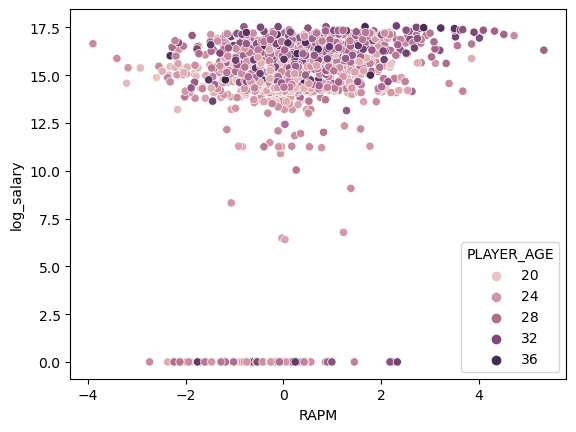

In [71]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='PLAYER_AGE')
plt.show()

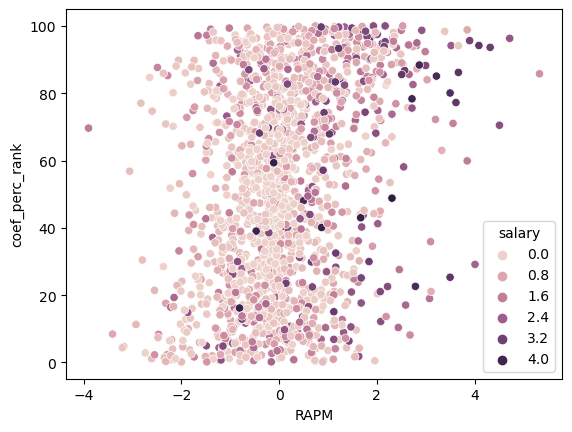

In [72]:
sns.scatterplot(data=df_model, x='RAPM', y='coef_perc_rank', hue='salary')
plt.show()

In [73]:
np.corrcoef(df_model['RAPM'], df_model['coef_perc_rank'])

array([[1.        , 0.30023777],
       [0.30023777, 1.        ]])

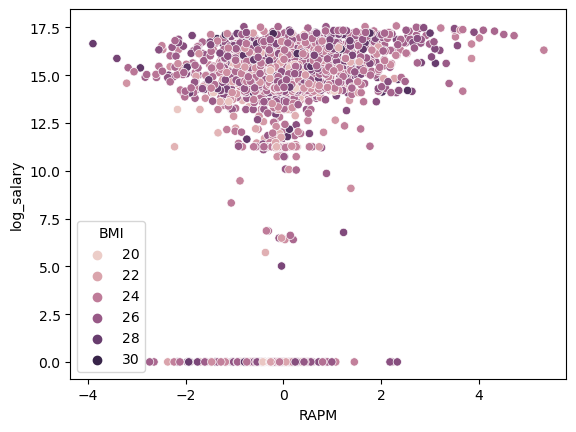

In [74]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='BMI')
plt.show()

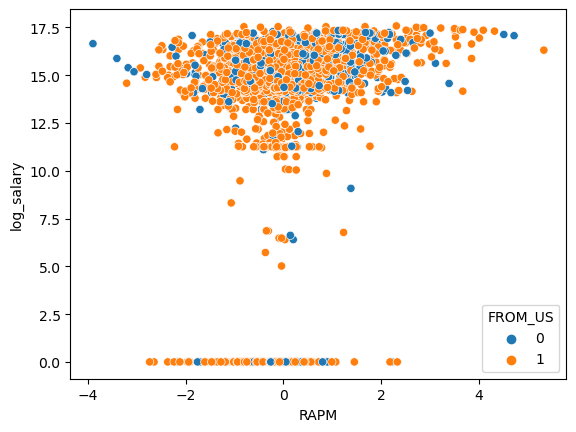

In [75]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='FROM_US')
plt.show()

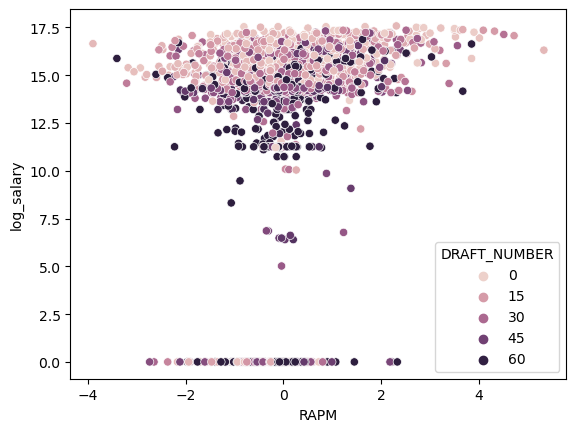

In [76]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='DRAFT_NUMBER')
plt.show()

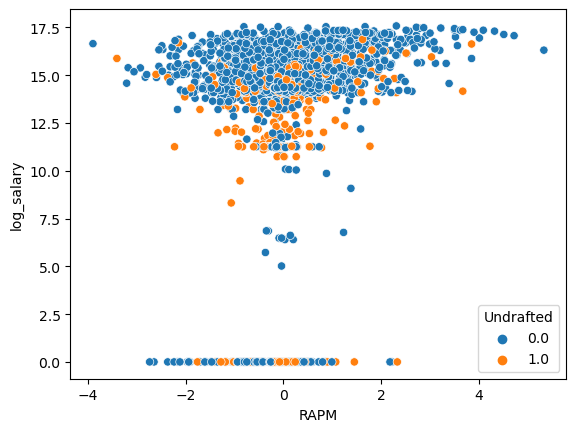

In [77]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='Undrafted')
plt.show()

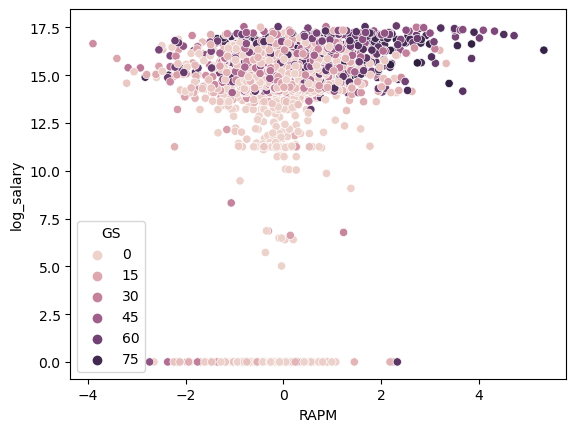

In [78]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='GS')
plt.show()

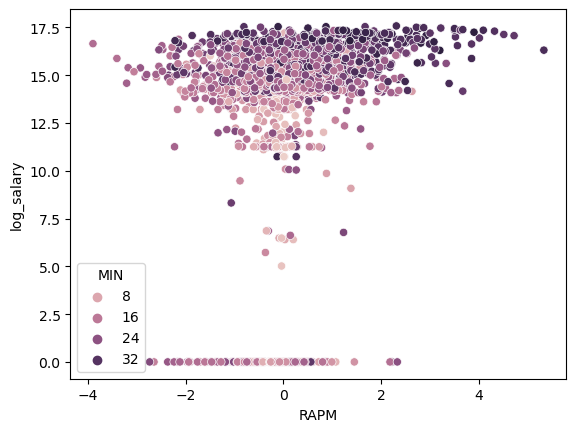

In [79]:
sns.scatterplot(data=df_model, x='RAPM', y='log_salary', hue='MIN')
plt.show()

In [258]:
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("./data/data_assets/mincer_data.csv")


features = ['RAPM', 'POSITION_Center', 'POSITION_Center-Forward', 'POSITION_Forward', 
            'POSITION_Forward-Center', 'POSITION_Forward-Guard','POSITION_Guard',
            'POSITION_Guard-Forward','HEIGHT_METER', 'WEIGHT_KG',
            'GP', 'GS', 'PTS', 'AST','OREB', 'DREB', 'MIN','FG_PCT', 'FG3_PCT', 'FT_PCT', 
            'ROOKIE', 'PLAYER_AGE', 'BMI', 'FROM_US',
            'PLAYER_AGE_2', 'DRAFT_NUMBER', 'Undrafted']

# season split
train_seasons = ["2016/17", "2017/18", "2018/19", "2019/20"]
test_seasons = ["2020/21"]

# bool array for train and test set
train = np.asarray(df_model['season'].isin(train_seasons))
test = np.asarray(df_model['season'].isin(test_seasons))

# get X and y
X = df_model[features].values
y = df_model['log_salary'].values

# train test split
X_train, y_train = X[train], y[train]
X_test, y_test = X[test], y[test]

# remove nas
#bool_na = (y != 0) & (np.isfinite(X).all(axis=1)) & (~np.isnan(y))
#X = X[bool_na]
#y = y[bool_na].reshape(-1, 1)

# remove na rows train set
bool_na_train = (y_train != 0) & (np.isfinite(X_train).all(axis=1)) & (~np.isnan(y_train))
X_train = X_train[bool_na_train]
y_train = y_train[bool_na_train].reshape(-1, 1)

# remove na rows test set
bool_na_test = (y_test!= 0) & (np.isfinite(X_test).all(axis=1)) & (~np.isnan(y_test))
X_test = X_test[bool_na_test]
y_test = y_test[bool_na_test].reshape(-1, 1)

# currently: do random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
tmp = pd.read_csv("./data/season_prediction/player_season_scores.csv", dtype={'PLAYER_ID':float})
tmp = tmp.rename(columns={'PLAYER_ID':'id', 'SEASON_ID':'season'})
tmp['season'] = tmp['season'].apply(lambda x: x.replace("-", "/"))
tmp2 = tmp[['season', 'id', 'DISPLAY_FIRST_LAST']]

In [81]:
pd.merge(df_model, tmp2, how='left', on=['season', 'id']).to_csv("./data/data_assets/mincer_data.csv")

In [287]:
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("./data/data_assets/mincer_data.csv")


features = ['RAPM', 'POSITION_Center', 'POSITION_Center-Forward', 'POSITION_Forward', 
            'POSITION_Forward-Center', 'POSITION_Forward-Guard','POSITION_Guard',
            'POSITION_Guard-Forward','HEIGHT_METER', 'WEIGHT_KG',
            'GP', 'GS', 'PTS', 'AST','OREB', 'DREB', 'MIN','FG_PCT', 'FG3_PCT', 'FT_PCT', 
            'ROOKIE', 'PLAYER_AGE', 'BMI', 'FROM_US',
            'PLAYER_AGE_2', 'DRAFT_NUMBER', 'Undrafted']

# season split
train_seasons = ["2016/17", "2017/18", "2018/19", "2019/20"]
test_seasons = ["2020/21"]

# bool array for train and test set
train = np.asarray(df_model['season'].isin(train_seasons))
test = np.asarray(df_model['season'].isin(test_seasons))

# get X and y
X = df_model[features].values
y = df_model['log_salary'].values
df = df_model

# train test split
X_train, y_train, df_train = X[train], y[train], df[train]
X_test, y_test, df_test = X[test], y[test], df[test]

# remove nas
bool_na = (y != 0) & (np.isfinite(X).all(axis=1)) & (~np.isnan(y))
X = X[bool_na]
y = y[bool_na].reshape(-1, 1)
df = df[bool_na]

# remove na rows train set
bool_na_train = (y_train != 0) & (np.isfinite(X_train).all(axis=1)) & (~np.isnan(y_train))
X_train = X_train[bool_na_train]
y_train = y_train[bool_na_train].reshape(-1, 1)
df_train = df_train[bool_na_train]

# remove na rows test set
bool_na_test = (y_test!= 0) & (np.isfinite(X_test).all(axis=1)) & (~np.isnan(y_test))
X_test = X_test[bool_na_test]
y_test = y_test[bool_na_test].reshape(-1, 1)
df_test = df_test[bool_na_test]

In [297]:
def get_player_image(player_id):
    """ Get a players image based on his id

    :param player_id: APIs player_id
    :return: Image, also opens the image
    """
    return Image.open(requests.get(f"https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/{str(player_id)}.png", stream=True).raw)

In [301]:
from PIL import Image
import requests
df_model['id'][0].apply(lambda x: get_player_image(int(x)))

KeyboardInterrupt: 

In [304]:
df_model.columns.tolist()

['Unnamed: 0',
 'id',
 'season',
 'salary',
 'PLAYER_AGE_y',
 'RAPM',
 'POSITION_Center',
 'POSITION_Center-Forward',
 'POSITION_Forward',
 'POSITION_Forward-Center',
 'POSITION_Forward-Guard',
 'POSITION_Guard',
 'POSITION_Guard-Forward',
 'HEIGHT_METER',
 'WEIGHT_KG',
 'DRAFT_NUMBER',
 'DRAFT_YEAR',
 'GP',
 'GS',
 'PTS',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'OREB',
 'DREB',
 'MIN',
 'FG_PCT',
 'FGA',
 'FG3_PCT',
 'FG3A',
 'FT_PCT',
 'FTA',
 'ROOKIE',
 'ROOKIE_AGE',
 'FROM_US',
 'coef_perc_rank',
 'Undrafted',
 'Undrafted_Rookie',
 'log_rapm',
 'RAPM_2',
 'log_rapm_2',
 'log_salary',
 'PLAYER_AGE',
 'PLAYER_AGE_2',
 'BMI',
 'log_BMI',
 'next_season_salary',
 'season_merge',
 'log_next_season_salary',
 'DISPLAY_FIRST_LAST']

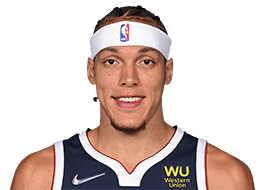

In [303]:
get_player_image(int(df_model['id'][0]))

In [288]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((696, 27), (696, 1), (278, 27), (278, 1))

In [289]:
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

ols = LinearRegression()
rf = RandomForestRegressor(max_depth=5, random_state=0)
svr = make_pipeline(StandardScaler(), SVR(C=0.005, epsilon=0.2, kernel='linear'))

In [290]:
svr.fit(X_train, y_train)
ols.fit(X_train, y_train)
rf.fit(X_train, y_train)

ols.score(X_test, y_test), rf.score(X_test, y_test), svr.score(X_test, y_test)

pd.DataFrame({'Feature':features, 'Parameter':ols.coef_.flatten()})

,Feature,Parameter
0,RAPM,-0.063285
1,POSITION_Center,0.221655
2,POSITION_Center-Forward,-0.039889
3,POSITION_Forward,-0.011971
4,POSITION_Forward-Center,-0.084066
5,POSITION_Forward-Guard,-0.008056
6,POSITION_Guard,-0.021997
7,POSITION_Guard-Forward,-0.055676
8,HEIGHT_METER,0.852193
9,WEIGHT_KG,-0.005896


In [291]:
from sklearn.model_selection import GridSearchCV
def wrapper_tune_fite(X_train, y_train, model, param_grid):

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

    # perform gridsearch
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    # tuned hyperparameters
    print(best_params)
    model.set_params(**best_params)

    print("Fit and score model with best params... \n")
    model.fit(X_train, y_train)
    
    return model

def fit_predict_full(X, y, model):
    """ wrapper to fit and predict on full data set
    """
    # fit and predict
    model.fit(X, y)
    prediction = model.predict(X)
    
    return prediction, model

In [292]:
#ols
ols.fit(X_train, y_train)
ols.score(X_test, y_test)

0.5379336178545235

In [293]:
# rf
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 7, 9, 12, 15],
    'min_samples_leaf': [2, 5, 7],
    'n_estimators': [75, 100, 125]
}

# Create a based model
rf = RandomForestRegressor()
rf = wrapper_tune_fite(X_train=X_train, y_train=y_train, model=rf, param_grid=param_grid)

rf.score(X_test, y_test)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'max_depth': 12, 'min_samples_leaf': 7, 'n_estimators': 75}
Fit and score model with best params... 



0.607124451144878

In [294]:
# svr
# Create the parameter grid based on the results of random search 
param_grid = {'svr__kernel': ['rbf', 'linear'], 
              'svr__C': [1e-2, 3e-2, 7e-2], 
              'svr__epsilon':[1e-10, 1e-7, 1e-5]}

# Create a based model
svr = make_pipeline(StandardScaler(), SVR())
svr = wrapper_tune_fite(X_train=X_train, y_train=y_train, model=svr, param_grid=param_grid)

svr.score(X_test, y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'svr__C': 0.01, 'svr__epsilon': 1e-10, 'svr__kernel': 'linear'}
Fit and score model with best params... 



0.5650136068745384

In [295]:
pred_ols, ols = fit_predict_full(X=X_ts, y=y, model=ols)
pred_rf, rf = fit_predict_full(X=X, y=y, model=rf)
pred_svr, svr = fit_predict_full(X=X, y=y, model=svr)

In [274]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute_percentage_error(y, pred_ols), mean_absolute_percentage_error(y, pred_rf), mean_absolute_percentage_error(y, pred_svr)

(0.0403901084330593, 0.02395180791773526, 0.040255234263914745)

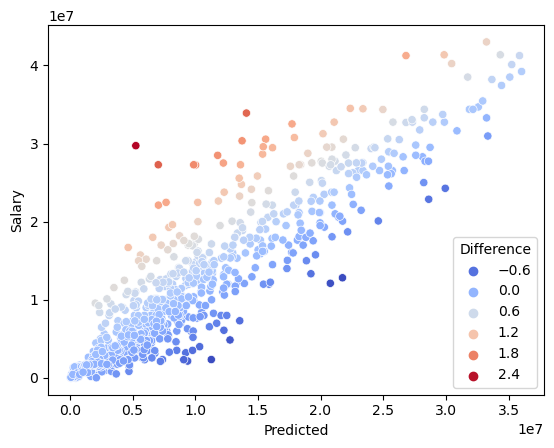

In [275]:
# set up the plot dataset
df_plot = df
df_plot['log_Salary'] = y.flatten()
df_plot['log_Predicted'] = pred_rf.flatten()
df_plot['Salary'] = np.exp(df_plot['log_Salary'])
df_plot['Predicted'] = np.exp(df_plot['log_Predicted'])
df_plot['log_Difference'] = df_plot['log_Salary'] - df_plot['log_Predicted']
df_plot['Difference'] = df_plot['Salary'] - df_plot['Predicted']

# scatterplot
sns.scatterplot(data=df_plot, x='Predicted', y='Salary', hue='Difference', palette="coolwarm")

plt.show()